## Finance Data Project 

**This project is focused on exploratory data analysis (EDA) of stock prices, on bank securities and how they have evolved throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) until November 2021.**

---
Este proyecto esta centrado en el análisis exploratorio de datos (EDA) de los precios de las acciones, en los valores bancarios y cómo han evolucionado a lo largo de la [crisis financiera](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) hasta noviembre de 2021.

### Importing libraries (Importando las librerias)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline


###  Get the Data (obtener los datos)

Get stock information for the following banks (Obtener información sobre las acciones de los siguientes bancos):

  * Bank of America
  * CitiGroup
  * Goldman Sachs
  * JPMorgan Chase
  * Morgan Stanley
  * Wells Fargo

**On this page is the documentation for getting the financial data, tips and instructions. In this case I will use Yahoo Finance Data finance as a source.** 

 En esta página está la documentación para obtener los datos financieros consejos e instrucciones. En este caso utlizaré Yahoo Finance Data finance como [fuente](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) 

In [31]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime.today()

In [32]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)


In [33]:
# Revisando que se hayan creado los datasets de cada banco
MS

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,36.114258
2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0,36.139038
2006-01-05,58.590000,58.020000,58.549999,58.509998,5778000.0,36.238129
2006-01-06,58.849998,58.049999,58.770000,58.570000,6889800.0,36.275299
2006-01-09,59.290001,58.619999,58.630001,59.189999,4144500.0,36.659286
...,...,...,...,...,...,...
2021-11-19,97.879997,94.949997,96.220001,96.910004,9923400.0,96.910004
2021-11-22,100.529999,97.820000,98.290001,99.320000,10430400.0,99.320000
2021-11-23,102.129997,100.180000,100.309998,101.860001,8559200.0,101.860001


**Create a list of the ticker symbols (as strings) in alphabetical order.**

Crear una lista de los tickers (como strings) en orden alfabético.

In [34]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Concatenate the dataframes of the banks into a single dataframe.**

 Concatenar los dataframes de los bancos en un único dataframe.

In [35]:
# axis=1 concatena en columnas
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys= tickers)
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.106041   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.743820   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.787281   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.736580   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.758301   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  36.114258  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  36.139038  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  36.238129  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  36.275299  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  36.659286  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.444868  
2006-01-04  31.530001  10870000.0  20.207741  
2006-01-05  31.495001  10158000.0  20.185307  
2006-01-06  31.680000   8403800.0  20.303871  
2006-01-09  31.674999   5619600.0  20.300667  

[5 rows x 36 columns]

**Set 'Bank Stock' and 'Stock info' as levels to sort the columns :**

Establecer como niveles 'Bank Stock' y 'Stock info' para ordenar las columnas :

In [36]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [37]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.106041  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.743820  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.787281  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.736580  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.758301  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.114258  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.139038  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.238129  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.275299  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.659286  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.444868  
2006-01-04   31.799999  31.530001  10870000.0  20.207741  
2006-01-05   31.500000  31.495001  10158000.0  20.185307  
2006-01-06   31.580000  31.680000   8403800.0  20.303871  
2006-01-09   31.674999  31.674999   5619600.0  20.300667  

[5 rows x 36 columns]

---
##  EDA (Exploratory Data Analysis) 


**What is the max Close price for each bank's stock throughout the time period?**

¿Cuál es el precio máximo de cierre de las acciones de cada banco a lo largo del período?

In [38]:
bank_stocks['BAC']['Close'].max() 

54.900001525878906

In [39]:
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 423.8500061035156
JPM 171.77999877929688
MS 105.44999694824219
WFC 65.93000030517578


In [40]:
# usando xs method
bank_stocks.xs(key= 'Close', axis= 1, level= 'Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     423.850006
JPM    171.779999
MS     105.449997
WFC     65.930000
dtype: float64

**New dataframe of each bank's stock returns. The returns are usually defined by the formula**

Nuevo dataframe de los rendimientos de las acciones de cada banco. Los rendimientos se definen normalmente por la formula:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [41]:
returns = pd.DataFrame()

**pandas pct_change( ) method on the Close column to create a column representing this return value.**

método pandas pct_change( ) en la columna Close para crear una columna que represente este valor de retorno. 

In [42]:
for tick in tickers:
    # diccionario, returns[tick + ' Returns'] es el nombre de la columna
    returns[tick + ' Returns'] = bank_stocks[tick]['Close'].pct_change()


In [43]:
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [44]:
# ocultando la 1er fila que contiene valores nulos
returns[1: ].head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000789


**what dates did each bank's stock have the best and worst one-day returns?**

¿en qué fechas las acciones de cada banco tuvieron los mejores y peores rendimientos de un día?

In [45]:
returns.min()

BAC Returns   -0.289694
C Returns     -0.390244
GS Returns    -0.189596
JPM Returns   -0.207274
MS Returns    -0.258929
WFC Returns   -0.238223
dtype: float64

In [46]:
returns['BAC Returns'].min()

-0.2896935896149381

**4 of the banks share the same day for the worst drop**

4 de los bancos comparten el mismo día para la peor caída

In [47]:
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

In [48]:
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

**JPM has the worst and best performance with only one day difference and MS bank with 4 days difference.** 

JPM tiene el peor y mejor rendimiento con sólo un día de diferencía y el banco MS con 4 días de diferencia 

**A very large standard deviation of returns shows that the stock is going up and down a lot compared to a small std deviation which means that the stock price is stable.  In this case CityGroup (C) has the largest std deviation and GS the smallest.**

una desviacición estandar de los rendimientos muy grande muestra que las acciones estan subiendo y bajando mucho en comparacion con una desviacíon std pequeña la cual significa que el precio de las acciones son estables.  En este caso CityGroup (C) tiene la desviacion std mas amplia y GS la mas pequeña. 

In [49]:
# std() --> desv estandar
returns.std()

BAC Returns    0.031792
C Returns      0.033641
GS Returns     0.023362
JPM Returns    0.024665
MS Returns     0.032650
WFC Returns    0.027202
dtype: float64

In [50]:
returns.head(3)

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110


In [52]:
# ahora revisando los retornos para el año 2020 cuando inicio la pandemia por covid
returns.loc['2020-01-01': '2020-12-31'].std()

BAC Returns    0.036933
C Returns      0.042502
GS Returns     0.032929
JPM Returns    0.034272
MS Returns     0.036164
WFC Returns    0.038573
dtype: float64

**reviewing 2020 returns for CitiGroup**

revisando los rendimientos de 2020 para CitiGroup

**up to 20 % std deviation from the mean can be observed.**

se puede observar hasta 20 % de desviacion std con respecto la media

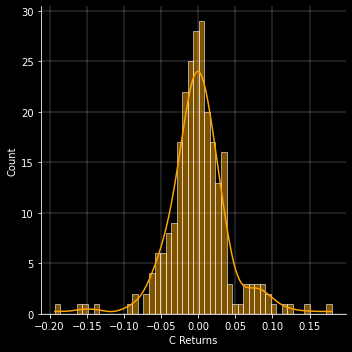

In [56]:
sns.displot(returns.loc['2020-01-01': '2020-12-31']['C Returns'], color= 'orange', bins= 50, kde=True)
plt.grid(lw = 0.25)

**CitiGroup's performance for 2008**

rendimiento de CitiGroup para el 2008 el cual fue un año bastante volátil para los bancos

**there is a std deviation of up to 60% for the year 2008**

existe una desviación std hasta de 60 % para el año 2008, en el grafico se muestra como un valor atípico

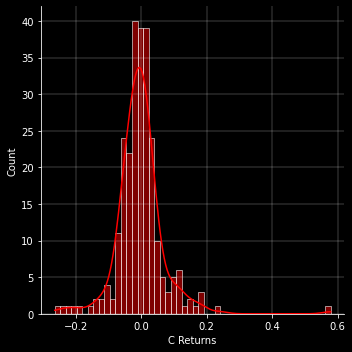

In [57]:
sns.displot(returns.loc['2008-01-01': '2008-12-31']['C Returns'], color= 'red', bins= 50 , kde=True)
plt.grid(lw = 0.25)

In [71]:
# Optional Plotly Method Imports
import plotly
import plotly.express as px 
#import cufflinks as cf
#cf.go_offline()

**closing price of each bank for the entire time index.**

precio de cierre de cada banco para todo el índice de tiempo.

In [59]:
bank_stocks.head(2)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.106041  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.743820  491.000000  483.500000  488.600006  483.799988  ...   

Bank Ticker         MS                                      WFC          \
Stock Info        Open      Close     Volume  Adj Close    High     Low   
Date                                                                      
2006-01-03   57.169998  58.310001  5377000.0  36.114258  31.975  31.195   
2006-01-04   58.700001  58.349998  7977800.0  36.139038  31.820  31.365   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.444868  
2006-01-04   31.799999  31.530001  10870000.0  20.207741  

[2 rows x 36 columns]

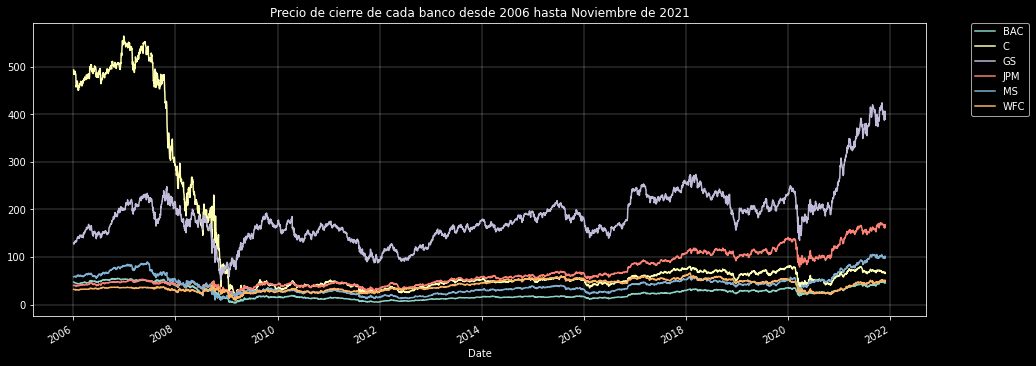

In [67]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label= tick, figsize= (16, 6))
plt.title('Precio de cierre de cada banco desde 2006 hasta Noviembre de 2021')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0) 
plt.grid(lw = 0.25)   
plt.style.use('dark_background')



**Analyzing moving averages in 2008**

Analizando las medias móviles en el año 2008


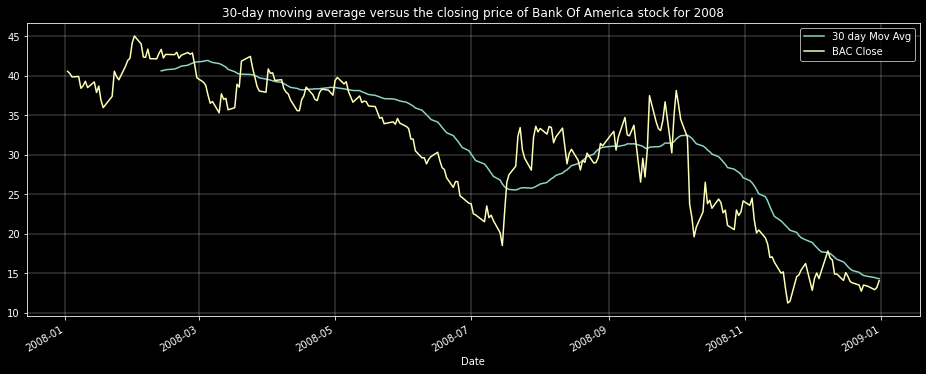

In [84]:
# 30-day moving average versus the closing price of Bank Of America's stock for 2008
# media móvil de 30 días frente al precio de cierre de las acciones de Bank Of America para el año 2008
plt.figure(figsize=(16, 6))
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label= '30 day Mov Avg')
BAC['Close'].loc['2008-01-01':'2008-12-31'].plot(label= 'BAC Close')
plt.title('30-day moving average versus the closing price of Bank Of America stock for 2008')
plt.legend()
plt.grid(lw=0.3)


**correlation between the closing price of the stocks.**

correlación entre el precio de cierre de las acciones.

In [85]:
bank_stocks.head(3)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.106041  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.743820  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.787281  487.799988  484.000000  484.399994  486.200012  ...   

Bank Ticker         MS                                      WFC             \
Stock Info        Open      Close     Volume  Adj Close    High        Low   
Date                                                                         
2006-01-03   57.169998  58.310001  5377000.0  36.114258  31.975  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.139038  31.820  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.238129  31.555  31.309999   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.444868  
2006-01-04   31.799999  31.530001  10870000.0  20.207741  
2006-01-05   31.500000  31.495001  10158000.0  20.185307  

[3 rows x 36 columns]

In [86]:
# usando  el metodo xs( ) para sólo la columna 'Close', en el nivel 'Stoc Info'
bank_stocks.xs(key= 'Close', axis= 1, level= 'Stock Info')

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999
...,...,...,...,...,...,...
2021-11-19,45.400002,66.339996,387.390015,160.919998,96.910004,48.820000
2021-11-22,46.279999,67.040001,396.160004,164.350006,99.320000,50.340000
2021-11-23,47.500000,68.070000,406.339996,168.279999,101.860001,51.400002


In [87]:
# mostrando correlaciones
bank_stocks.xs(key= 'Close', axis= 1, level= 'Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.813575,0.553948,0.354875,0.888265,0.108391
C,0.813575,1.000000,0.050794,-0.213511,0.577075,-0.165844
GS,0.553948,0.050794,1.000000,0.850516,0.812938,0.482792
JPM,0.354875,-0.213511,0.850516,1.000000,0.599064,0.538149
MS,0.888265,0.577075,0.812938,0.599064,1.000000,0.212372
WFC,0.108391,-0.165844,0.482792,0.538149,0.212372,1.000000


<AxesSubplot:title={'center':"Correlation between the closing price of each bank's stock"}, xlabel='Bank Ticker', ylabel='Bank Ticker'>

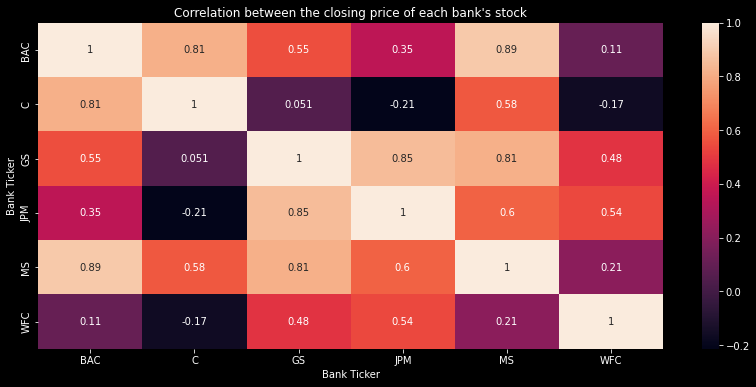

In [91]:
plt.figure(figsize=(14, 6))
plt.title("Correlation between the closing price of each bank's stock")
sns.heatmap(bank_stocks.xs(key= 'Close', axis= 1, level= 'Stock Info').corr(), annot=True)
